# Web scraping avec Python

Lino Galiana  
2024-09-23

<div class="alert alert-info" role="alert">
<h3 class="alert-heading">Version 🇫🇷</h3>
This is the French version 🇫🇷 of that chapter,to see the English version go <a href="https://pythonds.linogaliana.fr/content/manipulation/04a_webscraping_TP.html">there</a>
</div>

Le [*web scraping*](https://fr.wikipedia.org/wiki/Web_scraping) désigne les techniques d’extraction du contenu des sites internet.
C’est une pratique très utile pour toute personne souhaitant travailler sur des informations disponibles en ligne, mais n’existant pas forcément sous la forme d’un tableau *Excel*.

Ce TP vous présente comment créer et exécuter des robots afin de recupérer rapidement des informations utiles à vos projets actuels ou futurs.
Il part de quelques cas d’usages concret.
Ce chapitre est très fortement inspiré et réadapté à partir de [celui de Xavier Dupré](http://www.xavierdupre.fr/app/ensae_teaching_cs/helpsphinx/notebooks/TD2A_Eco_Web_Scraping.html), l’ancien professeur de la matière.

# 1. Enjeux

Un certain nombre d’enjeux du *web scraping* ne seront évoqués
que superficiellement dans le cadre de ce chapitre.

## 1.1 La zone grise de la légalité du *web scraping*

En premier lieu, en ce qui concerne la question de la légalité
de la récupération d’information par *scraping*, il existe
une zone grise. Ce n’est pas parce qu’une information est
disponible sur internet, directement ou avec un peu de recherche,
qu’elle peut être récupérée et réutilisée.

L’excellent [cours d’Antoine Palazzolo](https://inseefrlab.github.io/formation-webscraping/) évoque un certain nombre de cas
médiatiques et judiciaires sur cette question.
Dans le champ français, la CNIL a publié en 2020
de nouvelles directives sur le *web scraping* reprécisant
que toute donnée ne peut être réutilisée à l’insu de la personne
à laquelle ces données appartiennent. Autrement dit, en principe,
les données collectées par *web scraping* sont soumises au
RGPD, c’est-à-dire nécessitent le consentement des personnes
à partir desquelles la réutilisation des données est faite.

Il est donc recommandé d’**être vigilant avec les données récupérées**
par *web scraping* pour ne pas se mettre en faute légalement.

## 1.2 Stabilité et fiabilité des informations reçues

La récupération de données par *web scraping*
est certes pratique mais elle ne correspond pas nécessairement
à un usage pensé, ou désiré, par un fournisseur de données.
Les données étant coûteuses à collecter et à mettre à disposition,
certains sites ne désirent pas nécessairement que celles-ci soient
extraites gratuitement et facilement. *A fortiori* lorsque la donnée
peut permettre à un concurrent de disposer d’une information
utile d’un point de vue commercial (prix d’un produit concurrent, etc.).

Les acteurs mettent donc souvent en oeuvre des stratégies pour bloquer ou
limiter la quantité de données scrapées. La méthode la plus
classique est la détection et le blocage
des requêtes faites par des robots plutôt que par des humains.
Pour des acteurs spécialisés, cette détection est très facile car
de nombreuses preuves permettent d’identifier si une visite du site *web*
provient d’un utilisateur
humain derrière un navigateur ou d’un robot. Pour ne citer que quelques indices :
vitesse de la navigation entre pages, rapidité à extraire la donnée,
empreinte digitale du navigateur utilisé, capacité à répondre à des
questions aléatoires (captcha)…
Les bonnes pratiques, évoquées par la suite, ont pour objectif de faire
en sorte qu’un robot se comporte de manière civile en adoptant un comportement
proche de celui de l’humain mais sans contrefaire le fait qu’il ne s’agit
pas d’un humain.

Il convient d’ailleurs
d’être prudent quant aux informations reçues par *web scraping*.
La donnée étant au coeur du modèle économique de certains acteurs, certains
n’hésitent pas à renvoyer des données fausses aux robots
plutôt que les bloquer. C’est de bonne guerre !
Une autre technique piège s’appelle le *honey pot*. Il s’agit de pages qu’un humain
n’irait jamais visiter - par exemple parce qu’elles n’apparaissent pas dans
l’interface graphique - mais sur lesquelles un robot, en recherche automatique
de contenu, va rester bloquer.

Sans aller jusqu’à la stratégie de blocage du *web scraping*, d’autres raisons
peuvent expliquer qu’une récupération de données ait fonctionné par
le passé mais ne fonctionne plus. La plus fréquente est un changement dans la structure
d’un site *web*. Le *web scraping* présente en effet l’inconvénient d’aller chercher
de l’information dans une structure très hiérarchisée. Un changement dans cette structure
peut suffire à rendre un robot incapable de récupérer du contenu. Or, pour rester
attractifs, les sites *web* changent fréquemment ce qui peut facilement
rendre inopérant un robot.

De manière générale, l’un des principaux messages de ce
chapitre, à retenir, est que le
**web scraping est une solution de dernier ressort, pour des récupérations ponctuelles de données sans garantie de fonctionnement ultérieur**. Il est préférable de **privilégier les API lorsque celles-ci sont disponibles**.
Ces dernières ressemblent à un contrat (formel ou non) entre un fournisseur de données
et un utilisateur où sont définis des besoins (les données) mais aussi des
conditions d’accès (nombre de requêtes, volumétrie, authentification…) là
où le *web scraping* est plus proche du comportement dans le *Far West*.

## 1.3 Les bonnes pratiques

La possibilité de récupérer des données par l’intermédiaire
d’un robot ne signifie pas qu’on peut se permettre de ne pas être
civilisé. En effet, lorsqu’il est non-maîtrisé, le
*web scraping* peut ressembler à une attaque informatique
classique pour faire sauter un site *web* : le déni de service.
Le [cours d’Antoine Palazzolo](https://inseefrlab.github.io/formation-webscraping/) revient
sur certaines bonnes pratiques qui ont émergé dans la communauté
des *scrapeurs*. Il est recommandé de lire cette ressource
pour en apprendre plus sur ce sujet. Y sont évoquées
plusieurs conventions, parmi lesquelles :

-   Se rendre, depuis la racine du site,
    sur le fichier `robots.txt` pour vérifier les consignes
    proposées par les développeurs du site *web* pour
    cadrer le comportement des robots ;
-   Espacer chaque requêtes de plusieurs secondes, comme le ferait
    un humain, afin d’éviter de surcharger le site *web* et de le
    faire sauter par déni de service ;
-   Faire les requêtes dans les heures creuses de fréquentation du
    site *web* s’il ne s’agit pas d’un site consulté internationalement.
    Par exemple, pour un site en français, lancer le robot
    pendant la nuit en France métropolitaine, est une bonne pratique.
    Pour lancer un robot depuis `Python` à une heure programmée
    à l’avance, il existe les `cronjobs`.

# 2. Un détour par le Web : comment fonctionne un site ?

Même si ce TP ne vise pas à faire un cours de web, il vous faut néanmoins certaines bases sur la manière dont un site internet fonctionne afin de comprendre comment sont structurées les informations sur une page.

Un site Web est un ensemble de pages codées en *HTML* qui permet de décrire à la fois le contenu et la forme d’une page *Web*.

Pour voir cela, ouvrez n’importe quelle page web et faites un clic-droit dessus.

-   Sous `Chrome` <i class="fab fa-chrome"></i> : Cliquez ensuite sur *“Affichez le code source de la page”* (<kbd>CTRL</kbd>+<kbd>U</kbd>) ;
-   Sous `Firefox` <i class="fab fa-firefox"></i> : *“Code source de la page”* (<kbd>CTRL</kbd>+<kbd>MAJ</kbd>+<kbd>K</kbd>) ;
-   Sous `Edge` <i class="fab fa-edge"></i> : *“Affichez la page source”* (<kbd>CTRL</kbd>+<kbd>U</kbd>) ;
-   Sous `Safari` <i class="fab fa-safari"></i> : voir comment faire [ici](https://fr.wikihow.com/voir-le-code-source)

Si vous savez quel élément vous intéresse, vous pouvez également ouvrir l’inspecteur du navigateur (clic droit sur l’élément + “Inspecter”),
pour afficher les balises encadrant votre élément de façon plus ergonomique, un peu comme un zoom.

## 2.1 Les balises

Sur une page web, vous trouverez toujours à coup sûr des éléments comme `<head>`, `<title>`, etc. Il s’agit des codes qui vous permettent de structurer le contenu d’une page *HTML* et qui s’appellent des **balises**.
Citons, par exemple, les balises `<p>`, `<h1>`, `<h2>`, `<h3>`, `<strong>` ou `<em>`.
Le symbole `< >` est une balise : il sert à indiquer le début d’une partie. Le symbole `</ >` indique la fin de cette partie. La plupart des balises vont par paires, avec une *balise ouvrante* et une *balise fermante* (par exemple `<p>` et `</p>`).

Par exemple, les principales balises
définissant la structure d’un tableau sont les suivantes :

| Balise      | Description                     |
|-------------|---------------------------------|
| `<table>`   | Tableau                         |
| `<caption>` | Titre du tableau                |
| `<tr>`      | Ligne de tableau                |
| `<th>`      | Cellule d’en-tête               |
| `<td>`      | Cellule                         |
| `<thead>`   | Section de l’en-tête du tableau |
| `<tbody>`   | Section du corps du tableau     |
| `<tfoot>`   | Section du pied du tableau      |

### 2.1.1 Application : un tableau en HTML

Le code `HTML` du tableau suivant :

``` {html}
<table>
<caption> Le Titre de mon tableau </caption>

   <tr>
      <th>Prénom</th>
      <th>Nom</th>
      <th>Profession</th>
   </tr>
   <tr>
      <td>Mike </td>
      <td>Stuntman</td>
      <td>Cascadeur</td>
   </tr>
   <tr>
      <td>Mister</td>
      <td>Pink</td>
      <td>Gangster</td>
   </tr>
</table>
```

Donnera dans le navigateur :

|        |          |            |
|--------|----------|------------|
| Prénom | Nom      | Profession |
| Mike   | Stuntman | Cascadeur  |
| Mister | Pink     | Gangster   |

Le Titre de mon tableau

### 2.1.2 Parent et enfant

Dans le cadre du langage HTML, les termes de parent (*parent*) et enfant (*child*) servent à désigner des élements emboîtés les uns dans les autres. Dans la construction suivante, par exemple :

``` html
<div> 
    <p>
       bla,bla
    </p>
</div>
```

Sur la page web, cela apparaitra de la manière suivante :

<div> 
    <p>
       bla,bla
    </p>
</div>

On dira que l’élément `<div>` est le parent de l’élément `<p>` tandis que l’élément `<p>` est l’enfant de l’élément `<div>`.

> *Mais pourquoi apprendre ça pour “scraper” ?*

Parce que, pour bien récupérer les informations d’un site internet, il faut pouvoir comprendre sa structure et donc son code HTML. Les fonctions `Python` qui servent au *scraping* sont principalement construites pour vous permettre de naviguer entre les balises.
Avec `Python`, vous allez en fait reproduire votre comportement manuel de recherche de manière
à l’automatiser.

# 3. Scraper avec `Python`: le package `BeautifulSoup`

## 3.1 Les packages disponibles

Dans la première partie de ce chapitre,
nous allons essentiellement utiliser le package [`BeautifulSoup4`](https://www.crummy.com/software/BeautifulSoup/bs4/doc/),
en conjonction avec [`requests`](https://requests.readthedocs.io/en/latest/). Ce dernier *package* permet de récupérer le texte
brut d’une page qui sera ensuite
inspecté via [`BeautifulSoup4`](https://www.crummy.com/software/BeautifulSoup/bs4/doc/).

`BeautifulSoup` sera suffisant quand vous voudrez travailler sur des pages HTML statiques. Dès que les informations que vous recherchez sont générées via l’exécution de scripts [Javascript](https://fr.wikipedia.org/wiki/JavaScript), il vous faudra passer par des outils comme [Selenium](https://selenium-python.readthedocs.io/).

De même, si vous ne connaissez pas l’URL, il faudra passer par un *framework* comme [Scrapy](https://scrapy.org/), qui passe facilement d’une page à une autre. On appelle
cette technique le *“web crawling”*. `Scrapy` est plus complexe à manipuler que `BeautifulSoup` : si vous voulez plus de détails, rendez-vous sur la page du [tutoriel `Scrapy`](https://doc.scrapy.org/en/latest/intro/tutorial.html).

Le *web scraping* est un domaine où la reproductibilité est compliquée à mettre en oeuvre.
Une page *web* évolue
potentiellement régulièrement et d’une page web à l’autre, la structure peut
être très différente ce qui rend certains codes difficilement exportables.
Par conséquent, la meilleure manière d’avoir un programme fonctionnel est
de comprendre la structure d’une page web et dissocier les éléments exportables
à d’autres cas d’usages des requêtes *ad hoc*.

In [1]:
!pip install -q lxml
!pip install bs4

<div class="alert alert-info" role="alert">
<h3 class="alert-heading"><i class="fa-solid fa-comment"></i> Note</h3>

Pour être en mesure d’utiliser `Selenium`, il est nécessaire
de faire communiquer `Python` avec un navigateur *web* (Firefox ou Chromium).
Le *package* `webdriver-manager` permet de faire savoir à `Python` où
se trouve ce navigateur s’il est déjà installé dans un chemin standard.
Pour l’installer, le code de la cellule ci-dessous peut être utilisé.

</div>

Pour faire fonctionner `Selenium`, il faut utiliser un package
nommé `webdriver-manager`. On va donc l’installer, ainsi que `selenium` :

In [2]:
!pip install selenium
!pip install webdriver-manager

## 3.2 Récupérer le contenu d’une page HTML

On va commencer doucement. Prenons une page *wikipedia*,
par exemple celle de la Ligue 1 de football, millésime 2019-2020 : [Championnat de France de football 2019-2020](https://fr.wikipedia.org/wiki/Championnat_de_France_de_football_2019-2020). On va souhaiter récupérer la liste des équipes, ainsi que les url des pages Wikipedia de ces équipes.

Etape 1️⃣ : se connecter à la page wikipedia et obtenir le code source.
Pour cela, le plus simple est d’utiliser le package `requests`. Celui-ci permet, au niveau de `Python` de faire la requête HTTP adéquate pour avoir le contenu d’une page à partir de son URL:

In [3]:
import requests
import bs4
import pandas as pd


In [4]:
import requests

url_ligue_1 = (
    "https://fr.wikipedia.org/wiki/Championnat_de_France_de_football_2019-2020"
)

request_text = requests.get(url_ligue_1).content


In [5]:
request_text


b'<!DOCTYPE html>\n<html class="client-nojs vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-sticky-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-clientpref-1 vector-feature-main-menu-pinned-disabled vector-feature-limited-width-clientpref-1 vector-feature-limited-width-content-enabled vector-feature-custom-font-size-clientpref-1 vector-feature-appearance-pinned-clientpref-1 vector-feature-night-mode-enabled skin-theme-clientpref-day vector-toc-available" lang="fr" dir="ltr">\n<head>\n<meta charset="UTF-8">\n<title>Championnat de France de football 2019-2020 \xe2\x80\x94 Wikip\xc3\xa9dia</title>\n<script>(function(){var className="client-js vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-sticky-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-clientpref-1 vector-feature-main-menu-pinned-disabl

Etape 2️⃣ : rechercher, dans ce code source foisonnant, les balises qui permettent d’extraire l’information qui nous intéresse. C’est l’intérêt principal du package `BeautifulSoup` que d’offrir des méthodes simples d’usage pour chercher, dans des textes pourtant complexes, des chaines de caractères à partir de balises HTML ou XML.

In [6]:
import bs4

page = bs4.BeautifulSoup(request_text, "lxml")


Si on *print* l’objet `page` créée avec `BeautifulSoup`,
on voit que ce n’est plus une chaine de caractères mais bien une page HTML avec des balises.
On peut à présent chercher des élements à l’intérieur de ces balises.

## 3.3 La méthode `find`

Comme première illustration de la puissance de `BeautifulSoup`, on veut connaître le titre de la page. Pour cela, on utilise la méthode `.find` et on lui demande *“title”*

In [7]:
print(page.find("title"))


<title>Championnat de France de football 2019-2020 — Wikipédia</title>

La méthode `.find` ne renvoie que la première occurrence de l’élément.

Pour vous en assurer, vous pouvez :

-   copier le bout de code source obtenu lorsque vous cherchez une `table`,
-   le coller dans une cellule de votre notebook,
-   et passer la cellule en *“Markdown”*.

La cellule avec le copier-coller du code source donne :

In [8]:
print(page.find("table"))


<table><caption style="background-color:#99cc99;color:#000000;">Généralités</caption><tbody><tr>
<th scope="row" style="width:10.5em;">Sport</th>
<td>
<a href="/wiki/Football" title="Football">Football</a></td>
</tr>
<tr>
<th scope="row" style="width:10.5em;">Organisateur(s)</th>
<td>
<a href="/wiki/Ligue_de_football_professionnel_(France)" title="Ligue de football professionnel (France)">LFP</a></td>
</tr>
<tr>
<th scope="row" style="width:10.5em;">Édition</th>
<td>
<abbr class="abbr" title="Quatre-vingt-deuxième (huitante-deuxième / octante-deuxième)">82<sup>e</sup></abbr></td>
</tr>
<tr>
<th scope="row" style="width:10.5em;">Lieu(x)</th>
<td>
<span class="datasortkey" data-sort-value="France"><span class="flagicon"><span class="mw-image-border noviewer" typeof="mw:File"><a class="mw-file-description" href="/wiki/Fichier:Flag_of_France.svg" title="Drapeau de la France"><img alt="Drapeau de la France" class="mw-file-element" data-file-height="600" data-file-width="900" decoding="async

ce qui est le texte source permettant de générer le tableau suivant :

<table>

<caption style="background-color:#99cc99;color:#000000;">

Généralités

</caption>

<tbody>

<tr>

<th scope="row" style="width:10.5em;">

Sport

</th>

<td>

<a href="/wiki/Football" title="Football">Football</a>

</td>

</tr>

<tr>

<th scope="row" style="width:10.5em;">

Organisateur(s)

</th>

<td>

<a href="/wiki/Ligue_de_football_professionnel_(France)" title="Ligue de football professionnel (France)">LFP</a>

</td>

</tr>

<tr>

<th scope="row" style="width:10.5em;">

Édition

</th>

<td>

<abbr class="abbr" title="Quatre-vingt-deuxième (huitante-deuxième / octante-deuxième)">82<sup>e</sup></abbr>

</td>

</tr>

<tr>

<th scope="row" style="width:10.5em;">

Lieu(x)

</th>

<td>

<span class="datasortkey" data-sort-value="France"><span class="flagicon"><span class="mw-image-border noviewer" typeof="mw:File"><a class="mw-file-description" href="/wiki/Fichier:Flag_of_France.svg" title="Drapeau de la France"><img alt="Drapeau de la France" class="mw-file-element" data-file-height="600" data-file-width="900" decoding="async" height="13" src="//upload.wikimedia.org/wikipedia/commons/thumb/c/c3/Flag_of_France.svg/20px-Flag_of_France.svg.png" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/c/c3/Flag_of_France.svg/30px-Flag_of_France.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/c/c3/Flag_of_France.svg/40px-Flag_of_France.svg.png 2x" width="20"/></a></span> </span><a href="/wiki/France" title="France">France</a></span> et <br/><span class="datasortkey" data-sort-value="Monaco"><span class="flagicon"><span class="mw-image-border noviewer" typeof="mw:File"><a class="mw-file-description" href="/wiki/Fichier:Flag_of_Monaco.svg" title="Drapeau de Monaco"><img alt="Drapeau de Monaco" class="mw-file-element" data-file-height="800" data-file-width="1000" decoding="async" height="16" src="//upload.wikimedia.org/wikipedia/commons/thumb/e/ea/Flag_of_Monaco.svg/20px-Flag_of_Monaco.svg.png" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/e/ea/Flag_of_Monaco.svg/30px-Flag_of_Monaco.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/e/ea/Flag_of_Monaco.svg/40px-Flag_of_Monaco.svg.png 2x" width="20"/></a></span> </span><a href="/wiki/Monaco" title="Monaco">Monaco</a></span>

</td>

</tr>

<tr>

<th scope="row" style="width:10.5em;">

Date

</th>

<td>

Du <time class="nowrap date-lien" data-sort-value="2019-08-09" datetime="2019-08-09"><a href="/wiki/9_ao%C3%BBt_en_sport" title="9 août en sport">9</a> <a class="mw-redirect" href="/wiki/Ao%C3%BBt_2019_en_sport" title="Août 2019 en sport">août</a> <a href="/wiki/2019_en_football" title="2019 en football">2019</a></time><br/>au <time class="nowrap date-lien" data-sort-value="2020-03-08" datetime="2020-03-08"><a href="/wiki/8_mars_en_sport" title="8 mars en sport">8 mars</a> <a href="/wiki/2020_en_football" title="2020 en football">2020</a></time> <small>(arrêt définitif)</small>

</td>

</tr>

<tr>

<th scope="row" style="width:10.5em;">

Participants

</th>

<td>

20 équipes

</td>

</tr>

<tr>

<th scope="row" style="width:10.5em;">

Matchs joués

</th>

<td>

279 (sur 380 prévus)

</td>

</tr>

<tr>

<th scope="row" style="width:10.5em;">

Site web officiel

</th>

<td>

<cite class="ouvrage" id="site_officiel" style="font-style: normal;"><a class="external text" href="https://www.ligue1.fr/" rel="nofollow">Site officiel</a></cite>

</td>

</tr>

</tbody>

</table>

## 3.4 La méthode `findAll`

Pour trouver toutes les occurrences, on utilise `.findAll()`.

In [12]:
print(
    "Il y a", len(page.findAll("table")), "éléments dans la page qui sont des <table>"
)


Il y a 34 éléments dans la page qui sont des <table>

<div class="alert alert-success" role="alert">
<h3 class="alert-heading"><i class="fa-solid fa-lightbulb"></i> Tip</h3>

`Python` n’est pas le seul langage qui permet de récupérer des éléments issus d’une page web. C’est l’un des objectifs principaux de `Javascript`, qui est accessible par le biais de n’importe quel navigateur web.

Par exemple, pour faire le parallèle avec `page.find('title')` que nous avons utilisé au niveau de `Python`, vous pouvez ouvrir la page [précédemment mentionnée](https://fr.wikipedia.org/wiki/Championnat_de_France_de_football_2019-2020) avec votre navigateur. Après avoir ouvert les outils de développement du navigateur (<kbd>CTRL</kbd>+<kbd>MAJ</kbd>+<kbd>K</kbd> sur `Firefox`), vous pouvez taper dans la console `document.querySelector("title")` qui vous permettra d’obtenir le contenu du noeud HTML recherché:

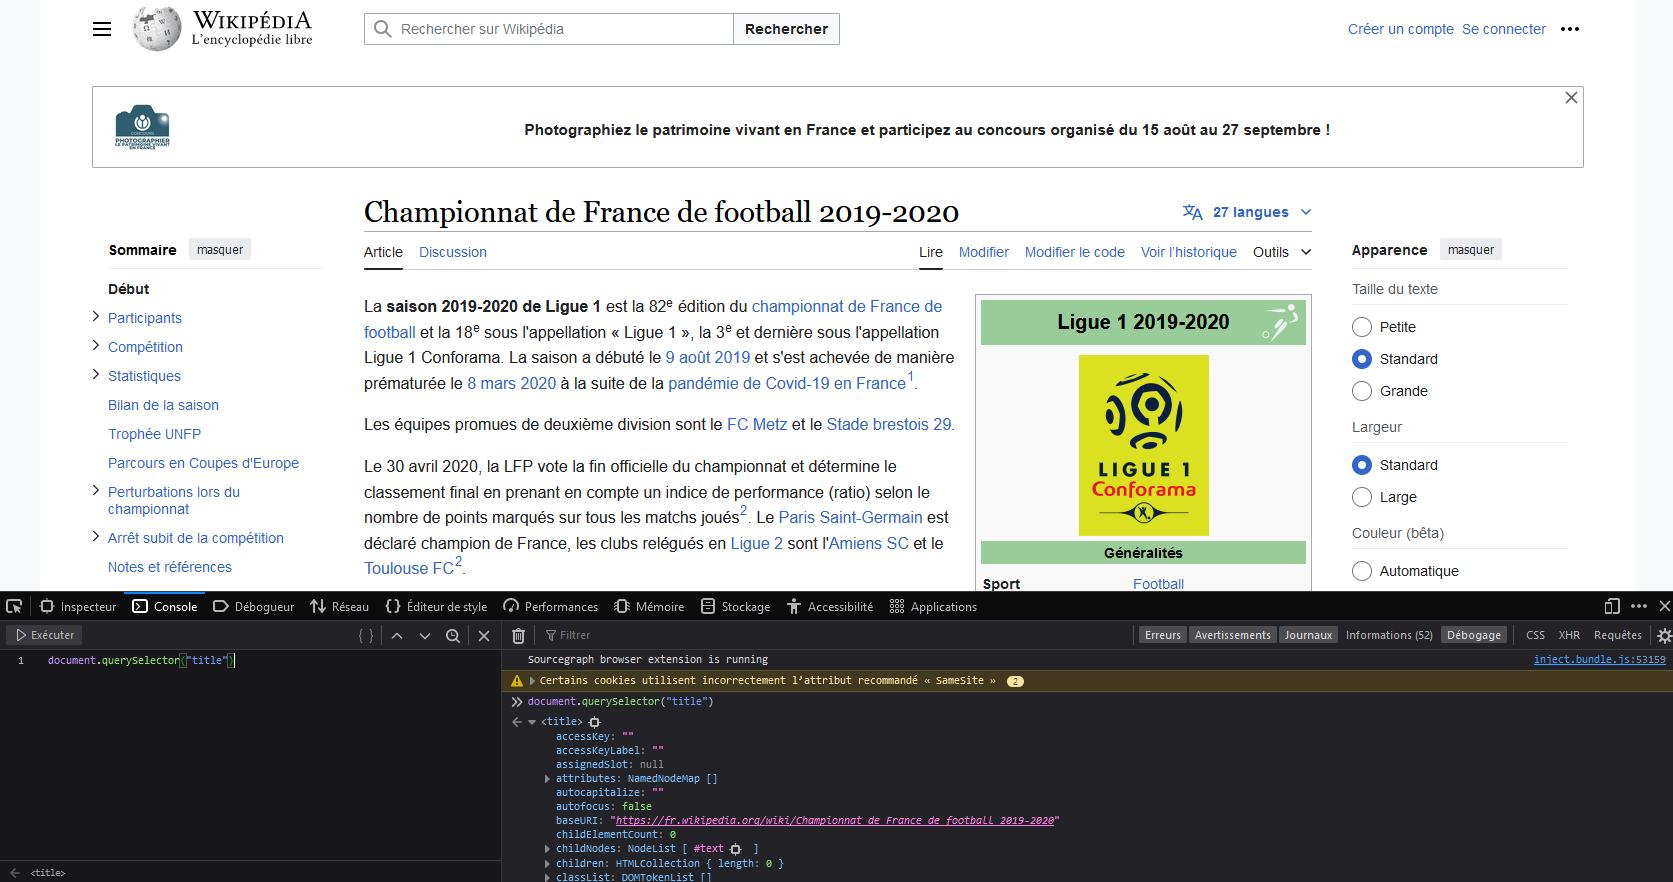

Si vous êtes amenés à utiliser `Selenium` pour faire du *web scraping*, vous retrouverez, en fait, ces verbes `Javascript` dans n’importe quelle méthode que vous allez utiliser.

La compréhension de la structure d’une page et de l’interaction de celle-ci avec le navigateur est extrêmement utile lorsqu’on fait du *scraping*, y compris lorsque le site est purement statique, c’est-à-dire qu’il ne comporte pas d’éléments réagissant à une action d’un navigateur web.

</div>

# 4. Exercice guidé : obtenir la liste des équipes de Ligue 1

Dans le premier paragraphe de la page *“Participants”*,
on a le tableau avec les résultats de l’année.

<div class="alert alert-success" role="alert">
<h3 class="alert-heading"><i class="fa-solid fa-pencil"></i> Exercice 1 : Récupérer les participants de la Ligue 1</h3>

Pour cela, nous allons procéder en 6 étapes:

1.  Trouver le tableau
2.  Récupérer chaque ligne du tableau
3.  Nettoyer les sorties en ne gardant que le texte sur une ligne
4.  Généraliser sur toutes les lignes
5.  Récupérer les entêtes du tableau
6.  Finalisation du tableau

</div>

1️⃣ Trouver le tableau

In [13]:
# on identifie le tableau en question : c'est le premier qui a cette classe "wikitable sortable"
tableau_participants = page.find("table", {"class": "wikitable sortable"})


``` python
print(tableau_participants)
```

Club

Dernière<br/>montée

Budget<sup class="reference" id="cite_ref-3"><a href="#cite_note-3"><span class="cite_crochet">\[</span>3<span class="cite_crochet">\]</span></a></sup><br/>en M<a href="/wiki/Euro" title="Euro">€</a>

Classement<br/><a href="/wiki/Championnat_de_France_de_football_2018-2019" title="Championnat de France de football 2018-2019">2018-2019</a>

Entraîneur

Depuis

Stade

Capacité<br/>en L1<sup class="reference" id="cite_ref-4"><a href="#cite_note-4"><span class="cite_crochet">\[</span>4<span class="cite_crochet">\]</span></a></sup>

Nombre<br/>de saisons<br/>en L1

<a href="/wiki/Paris_Saint-Germain_Football_Club" title="Paris Saint-Germain Football Club">Paris Saint-Germain</a>

1974

637

<span data-sort-value="101 !"></span><abbr class="abbr" title="Premier">1<sup>er</sup></abbr>

<span class="flagicon"><span class="mw-image-border noviewer" typeof="mw:File"><a class="mw-file-description" href="/wiki/Fichier:Flag_of_Germany.svg" title="Drapeau : Allemagne"><img alt="" class="mw-file-element" data-file-height="600" data-file-width="1000" decoding="async" height="12" src="//upload.wikimedia.org/wikipedia/commons/thumb/b/ba/Flag_of_Germany.svg/20px-Flag_of_Germany.svg.png" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/b/ba/Flag_of_Germany.svg/30px-Flag_of_Germany.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/b/ba/Flag_of_Germany.svg/40px-Flag_of_Germany.svg.png 2x" width="20"/></a></span></span> <a href="/wiki/Thomas_Tuchel" title="Thomas Tuchel">Thomas Tuchel</a>

2018

<a href="/wiki/Parc_des_Princes" title="Parc des Princes">Parc des Princes</a>

47 929

46

<a href="/wiki/LOSC_Lille" title="LOSC Lille">LOSC Lille</a>

2000

120

<span data-sort-value="102 !"></span><abbr class="abbr" title="Deuxième">2<sup>e</sup></abbr>

<span class="flagicon"><span class="mw-image-border noviewer" typeof="mw:File"><a class="mw-file-description" href="/wiki/Fichier:Flag_of_France.svg" title="Drapeau : France"><img alt="" class="mw-file-element" data-file-height="600" data-file-width="900" decoding="async" height="13" src="//upload.wikimedia.org/wikipedia/commons/thumb/c/c3/Flag_of_France.svg/20px-Flag_of_France.svg.png" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/c/c3/Flag_of_France.svg/30px-Flag_of_France.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/c/c3/Flag_of_France.svg/40px-Flag_of_France.svg.png 2x" width="20"/></a></span></span> <a href="/wiki/Christophe_Galtier" title="Christophe Galtier">Christophe Galtier</a>

2017

<a href="/wiki/Stade_Pierre-Mauroy" title="Stade Pierre-Mauroy">Stade Pierre-Mauroy</a>

49 712

59

<a href="/wiki/Olympique_lyonnais" title="Olympique lyonnais">Olympique lyonnais</a>

1989

310

<span data-sort-value="103 !"></span><abbr class="abbr" title="Troisième">3<sup>e</sup></abbr>

<span class="flagicon"><span class="mw-image-border noviewer" typeof="mw:File"><a class="mw-file-description" href="/wiki/Fichier:Flag_of_France.svg" title="Drapeau : France"><img alt="" class="mw-file-element" data-file-height="600" data-file-width="900" decoding="async" height="13" src="//upload.wikimedia.org/wikipedia/commons/thumb/c/c3/Flag_of_France.svg/20px-Flag_of_France.svg.png" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/c/c3/Flag_of_France.svg/30px-Flag_of_France.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/c/c3/Flag_of_France.svg/40px-Flag_of_France.svg.png 2x" width="20"/></a></span></span> <a href="/wiki/Rudi_Garcia" title="Rudi Garcia">Rudi Garcia</a>

2019

<a href="/wiki/Parc_Olympique_lyonnais" title="Parc Olympique lyonnais">Groupama Stadium</a>

57 206

60

<a href="/wiki/Association_sportive_de_Saint-%C3%89tienne" title="Association sportive de Saint-Étienne">AS Saint-Étienne</a>

2004

100

<span data-sort-value="104 !"></span><abbr class="abbr" title="Quatrième">4<sup>e</sup></abbr>

<span class="flagicon"><span class="mw-image-border noviewer" typeof="mw:File"><a class="mw-file-description" href="/wiki/Fichier:Flag_of_France.svg" title="Drapeau : France"><img alt="" class="mw-file-element" data-file-height="600" data-file-width="900" decoding="async" height="13" src="//upload.wikimedia.org/wikipedia/commons/thumb/c/c3/Flag_of_France.svg/20px-Flag_of_France.svg.png" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/c/c3/Flag_of_France.svg/30px-Flag_of_France.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/c/c3/Flag_of_France.svg/40px-Flag_of_France.svg.png 2x" width="20"/></a></span></span> <a href="/wiki/Claude_Puel" title="Claude Puel">Claude Puel</a>

2019

<a href="/wiki/Stade_Geoffroy-Guichard" title="Stade Geoffroy-Guichard">Stade Geoffroy-Guichard</a>

41 965

66

<a href="/wiki/Olympique_de_Marseille" title="Olympique de Marseille">Olympique de Marseille</a>

1996

110

<span data-sort-value="105 !"></span><abbr class="abbr" title="Cinquième">5<sup>e</sup></abbr>

<span class="flagicon"><span class="mw-image-border noviewer" typeof="mw:File"><a class="mw-file-description" href="/wiki/Fichier:Flag_of_Portugal.svg" title="Drapeau : Portugal"><img alt="" class="mw-file-element" data-file-height="400" data-file-width="600" decoding="async" height="13" src="//upload.wikimedia.org/wikipedia/commons/thumb/5/5c/Flag_of_Portugal.svg/20px-Flag_of_Portugal.svg.png" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/5/5c/Flag_of_Portugal.svg/30px-Flag_of_Portugal.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/5/5c/Flag_of_Portugal.svg/40px-Flag_of_Portugal.svg.png 2x" width="20"/></a></span></span> <a href="/wiki/Andr%C3%A9_Villas-Boas" title="André Villas-Boas">André Villas-Boas</a>

2019

<a href="/wiki/Stade_V%C3%A9lodrome" title="Stade Vélodrome">Orange Vélodrome</a>

66 226

69

<a href="/wiki/Montpellier_H%C3%A9rault_Sport_Club" title="Montpellier Hérault Sport Club">Montpellier HSC</a>

2009

40

<span data-sort-value="106 !"></span><abbr class="abbr" title="Sixième">6<sup>e</sup></abbr>

<span class="flagicon"><span class="mw-image-border noviewer" typeof="mw:File"><a class="mw-file-description" href="/wiki/Fichier:Flag_of_Armenia.svg" title="Drapeau : Arménie"><img alt="" class="mw-file-element" data-file-height="600" data-file-width="1200" decoding="async" height="10" src="//upload.wikimedia.org/wikipedia/commons/thumb/2/2f/Flag_of_Armenia.svg/20px-Flag_of_Armenia.svg.png" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/2/2f/Flag_of_Armenia.svg/30px-Flag_of_Armenia.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/2/2f/Flag_of_Armenia.svg/40px-Flag_of_Armenia.svg.png 2x" width="20"/></a></span></span><span class="flagicon"><span class="mw-image-border noviewer" typeof="mw:File"><a class="mw-file-description" href="/wiki/Fichier:Flag_of_France.svg" title="Drapeau : France"><img alt="" class="mw-file-element" data-file-height="600" data-file-width="900" decoding="async" height="13" src="//upload.wikimedia.org/wikipedia/commons/thumb/c/c3/Flag_of_France.svg/20px-Flag_of_France.svg.png" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/c/c3/Flag_of_France.svg/30px-Flag_of_France.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/c/c3/Flag_of_France.svg/40px-Flag_of_France.svg.png 2x" width="20"/></a></span></span> <a href="/wiki/Michel_Der_Zakarian" title="Michel Der Zakarian">Michel Der Zakarian</a>

2017

<a href="/wiki/Stade_de_la_Mosson" title="Stade de la Mosson">Stade de la Mosson</a>

22 000

27

<a class="mw-redirect" href="/wiki/Olympique_Gymnaste_Club_Nice" title="Olympique Gymnaste Club Nice">OGC Nice</a>

2002

50

<span data-sort-value="107 !"></span><abbr class="abbr" title="Septième">7<sup>e</sup></abbr>

<span class="flagicon"><span class="mw-image-border noviewer" typeof="mw:File"><a class="mw-file-description" href="/wiki/Fichier:Flag_of_France.svg" title="Drapeau : France"><img alt="" class="mw-file-element" data-file-height="600" data-file-width="900" decoding="async" height="13" src="//upload.wikimedia.org/wikipedia/commons/thumb/c/c3/Flag_of_France.svg/20px-Flag_of_France.svg.png" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/c/c3/Flag_of_France.svg/30px-Flag_of_France.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/c/c3/Flag_of_France.svg/40px-Flag_of_France.svg.png 2x" width="20"/></a></span></span> <a href="/wiki/Patrick_Vieira" title="Patrick Vieira">Patrick Vieira</a>

2018

<a href="/wiki/Allianz_Riviera" title="Allianz Riviera">Allianz Riviera</a>

35 596

60

<a href="/wiki/Stade_de_Reims" title="Stade de Reims">Stade de Reims</a>

2018

45

<span data-sort-value="108 !"></span><abbr class="abbr" title="Huitième">8<sup>e</sup></abbr>

<span class="flagicon"><span class="mw-image-border noviewer" typeof="mw:File"><a class="mw-file-description" href="/wiki/Fichier:Flag_of_France.svg" title="Drapeau : France"><img alt="" class="mw-file-element" data-file-height="600" data-file-width="900" decoding="async" height="13" src="//upload.wikimedia.org/wikipedia/commons/thumb/c/c3/Flag_of_France.svg/20px-Flag_of_France.svg.png" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/c/c3/Flag_of_France.svg/30px-Flag_of_France.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/c/c3/Flag_of_France.svg/40px-Flag_of_France.svg.png 2x" width="20"/></a></span></span> <a href="/wiki/David_Guion" title="David Guion">David Guion</a>

2017

<a href="/wiki/Stade_Auguste-Delaune" title="Stade Auguste-Delaune">Stade Auguste-Delaune</a>

20 546

35

<a href="/wiki/N%C3%AEmes_Olympique" title="Nîmes Olympique">Nîmes Olympique</a>

2018

27

<span data-sort-value="109 !"></span><abbr class="abbr" title="Neuvième">9<sup>e</sup></abbr>

<span class="flagicon"><span class="mw-image-border noviewer" typeof="mw:File"><a class="mw-file-description" href="/wiki/Fichier:Flag_of_France.svg" title="Drapeau : France"><img alt="" class="mw-file-element" data-file-height="600" data-file-width="900" decoding="async" height="13" src="//upload.wikimedia.org/wikipedia/commons/thumb/c/c3/Flag_of_France.svg/20px-Flag_of_France.svg.png" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/c/c3/Flag_of_France.svg/30px-Flag_of_France.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/c/c3/Flag_of_France.svg/40px-Flag_of_France.svg.png 2x" width="20"/></a></span></span> <a href="/wiki/Bernard_Blaquart" title="Bernard Blaquart">Bernard Blaquart</a>

2015

<a href="/wiki/Stade_des_Costi%C3%A8res" title="Stade des Costières">Stade des Costières</a>

15 788

35

<a class="mw-redirect" href="/wiki/Stade_rennais_football_club" title="Stade rennais football club">Stade rennais FC</a>

1994

65

<span data-sort-value="110 !"></span><abbr class="abbr" title="Dixième">10<sup>e</sup></abbr>

<span class="flagicon"><span class="mw-image-border noviewer" typeof="mw:File"><a class="mw-file-description" href="/wiki/Fichier:Flag_of_France.svg" title="Drapeau : France"><img alt="" class="mw-file-element" data-file-height="600" data-file-width="900" decoding="async" height="13" src="//upload.wikimedia.org/wikipedia/commons/thumb/c/c3/Flag_of_France.svg/20px-Flag_of_France.svg.png" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/c/c3/Flag_of_France.svg/30px-Flag_of_France.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/c/c3/Flag_of_France.svg/40px-Flag_of_France.svg.png 2x" width="20"/></a></span></span> <a href="/wiki/Julien_St%C3%A9phan" title="Julien Stéphan">Julien Stéphan</a>

2018

<a href="/wiki/Roazhon_Park" title="Roazhon Park">Roazhon Park</a>

29 194

62

<a href="/wiki/Racing_Club_de_Strasbourg_Alsace" title="Racing Club de Strasbourg Alsace">RC Strasbourg Alsace</a>

2017

43

<span data-sort-value="111 !"></span><abbr class="abbr" title="Onzième">11<sup>e</sup></abbr>

<span class="flagicon"><span class="mw-image-border noviewer" typeof="mw:File"><a class="mw-file-description" href="/wiki/Fichier:Flag_of_France.svg" title="Drapeau : France"><img alt="" class="mw-file-element" data-file-height="600" data-file-width="900" decoding="async" height="13" src="//upload.wikimedia.org/wikipedia/commons/thumb/c/c3/Flag_of_France.svg/20px-Flag_of_France.svg.png" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/c/c3/Flag_of_France.svg/30px-Flag_of_France.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/c/c3/Flag_of_France.svg/40px-Flag_of_France.svg.png 2x" width="20"/></a></span></span> <a href="/wiki/Thierry_Laurey" title="Thierry Laurey">Thierry Laurey</a>

2016

<a href="/wiki/Stade_de_la_Meinau" title="Stade de la Meinau">Stade de la Meinau</a>

26 109

58

<a href="/wiki/Football_Club_de_Nantes" title="Football Club de Nantes">FC Nantes</a>

2013

70

<span data-sort-value="112 !"></span><abbr class="abbr" title="Douzième">12<sup>e</sup></abbr>

<span class="flagicon"><span class="mw-image-border noviewer" typeof="mw:File"><a class="mw-file-description" href="/wiki/Fichier:Flag_of_France.svg" title="Drapeau : France"><img alt="" class="mw-file-element" data-file-height="600" data-file-width="900" decoding="async" height="13" src="//upload.wikimedia.org/wikipedia/commons/thumb/c/c3/Flag_of_France.svg/20px-Flag_of_France.svg.png" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/c/c3/Flag_of_France.svg/30px-Flag_of_France.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/c/c3/Flag_of_France.svg/40px-Flag_of_France.svg.png 2x" width="20"/></a></span></span> <a href="/wiki/Christian_Gourcuff" title="Christian Gourcuff">Christian Gourcuff</a>

2019

<a href="/wiki/Stade_de_la_Beaujoire" title="Stade de la Beaujoire">Stade de la Beaujoire - Louis Fonteneau</a>

35 322

51

<a class="mw-redirect" href="/wiki/Angers_sporting_club_de_l%27Ouest" title="Angers sporting club de l'Ouest">SCO d’Angers</a>

2015

32

<span data-sort-value="113 !"></span><abbr class="abbr" title="Treizième">13<sup>e</sup></abbr>

<span class="flagicon"><span class="mw-image-border noviewer" typeof="mw:File"><a class="mw-file-description" href="/wiki/Fichier:Flag_of_France.svg" title="Drapeau : France"><img alt="" class="mw-file-element" data-file-height="600" data-file-width="900" decoding="async" height="13" src="//upload.wikimedia.org/wikipedia/commons/thumb/c/c3/Flag_of_France.svg/20px-Flag_of_France.svg.png" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/c/c3/Flag_of_France.svg/30px-Flag_of_France.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/c/c3/Flag_of_France.svg/40px-Flag_of_France.svg.png 2x" width="20"/></a></span></span> <a href="/wiki/St%C3%A9phane_Moulin_(football)" title="Stéphane Moulin (football)">Stéphane Moulin</a>

2011

<a href="/wiki/Stade_Raymond-Kopa" title="Stade Raymond-Kopa">Stade Raymond-Kopa</a>

14 582

27

<a href="/wiki/Football_Club_des_Girondins_de_Bordeaux" title="Football Club des Girondins de Bordeaux">Girondins de Bordeaux</a>

1992

70

<span data-sort-value="114 !"></span><abbr class="abbr" title="Quatorzième">14<sup>e</sup></abbr>

<span class="flagicon"><span class="mw-image-border noviewer" typeof="mw:File"><a class="mw-file-description" href="/wiki/Fichier:Flag_of_Portugal.svg" title="Drapeau : Portugal"><img alt="" class="mw-file-element" data-file-height="400" data-file-width="600" decoding="async" height="13" src="//upload.wikimedia.org/wikipedia/commons/thumb/5/5c/Flag_of_Portugal.svg/20px-Flag_of_Portugal.svg.png" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/5/5c/Flag_of_Portugal.svg/30px-Flag_of_Portugal.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/5/5c/Flag_of_Portugal.svg/40px-Flag_of_Portugal.svg.png 2x" width="20"/></a></span></span> <a href="/wiki/Paulo_Sousa_(football,_1970)" title="Paulo Sousa (football, 1970)">Paulo Sousa</a>

2019

<a href="/wiki/Matmut_Atlantique" title="Matmut Atlantique">Matmut Atlantique</a>

42 115

66

<a href="/wiki/Amiens_Sporting_Club" title="Amiens Sporting Club">Amiens SC</a>

2017

30

<span data-sort-value="115 !"></span><abbr class="abbr" title="Quinzième">15<sup>e</sup></abbr>

<span class="flagicon"><span class="mw-image-border noviewer" typeof="mw:File"><a class="mw-file-description" href="/wiki/Fichier:Flag_of_Slovenia.svg" title="Drapeau : Slovénie"><img alt="" class="mw-file-element" data-file-height="600" data-file-width="1200" decoding="async" height="10" src="//upload.wikimedia.org/wikipedia/commons/thumb/f/f0/Flag_of_Slovenia.svg/20px-Flag_of_Slovenia.svg.png" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/f/f0/Flag_of_Slovenia.svg/30px-Flag_of_Slovenia.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/f/f0/Flag_of_Slovenia.svg/40px-Flag_of_Slovenia.svg.png 2x" width="20"/></a></span></span> <a href="/wiki/Luka_Elsner" title="Luka Elsner">Luka Elsner</a>

2019

<a href="/wiki/Stade_de_la_Licorne" title="Stade de la Licorne">Stade Crédit Agricole la Licorne</a>

12 999

2

<a href="/wiki/Toulouse_Football_Club" title="Toulouse Football Club">Toulouse FC</a>

2003

35

<span data-sort-value="116 !"></span><abbr class="abbr" title="Seizième">16<sup>e</sup></abbr>

<span class="flagicon"><span class="mw-image-border noviewer" typeof="mw:File"><a class="mw-file-description" href="/wiki/Fichier:Flag_of_France.svg" title="Drapeau : France"><img alt="" class="mw-file-element" data-file-height="600" data-file-width="900" decoding="async" height="13" src="//upload.wikimedia.org/wikipedia/commons/thumb/c/c3/Flag_of_France.svg/20px-Flag_of_France.svg.png" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/c/c3/Flag_of_France.svg/30px-Flag_of_France.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/c/c3/Flag_of_France.svg/40px-Flag_of_France.svg.png 2x" width="20"/></a></span></span> <a href="/wiki/Denis_Zanko" title="Denis Zanko">Denis Zanko</a>

2020

<a href="/wiki/Stadium_de_Toulouse" title="Stadium de Toulouse">Stadium de Toulouse</a>

33 033

32

<a class="mw-redirect" href="/wiki/Association_sportive_de_Monaco_football_club" title="Association sportive de Monaco football club">AS Monaco</a>

2013

220

<span data-sort-value="117 !"></span><abbr class="abbr" title="Dix-septième">17<sup>e</sup></abbr>

<span class="flagicon"><span class="mw-image-border noviewer" typeof="mw:File"><a class="mw-file-description" href="/wiki/Fichier:Flag_of_Spain.svg" title="Drapeau : Espagne"><img alt="" class="mw-file-element" data-file-height="500" data-file-width="750" decoding="async" height="13" src="//upload.wikimedia.org/wikipedia/commons/thumb/9/9a/Flag_of_Spain.svg/20px-Flag_of_Spain.svg.png" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/9/9a/Flag_of_Spain.svg/30px-Flag_of_Spain.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/9/9a/Flag_of_Spain.svg/40px-Flag_of_Spain.svg.png 2x" width="20"/></a></span></span> <a href="/wiki/Robert_Moreno" title="Robert Moreno">Robert Moreno</a>

2019

<a href="/wiki/Stade_Louis-II" title="Stade Louis-II">Stade Louis-II</a>

16 500

60

<a href="/wiki/Dijon_Football_C%C3%B4te-d%27Or" title="Dijon Football Côte-d'Or">Dijon FCO</a>

2016

38

<span data-sort-value="118 !"></span><abbr class="abbr" title="Dix-huitième">18<sup>e</sup></abbr>

<span class="flagicon"><span class="mw-image-border noviewer" typeof="mw:File"><a class="mw-file-description" href="/wiki/Fichier:Flag_of_France.svg" title="Drapeau : France"><img alt="" class="mw-file-element" data-file-height="600" data-file-width="900" decoding="async" height="13" src="//upload.wikimedia.org/wikipedia/commons/thumb/c/c3/Flag_of_France.svg/20px-Flag_of_France.svg.png" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/c/c3/Flag_of_France.svg/30px-Flag_of_France.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/c/c3/Flag_of_France.svg/40px-Flag_of_France.svg.png 2x" width="20"/></a></span></span> <a href="/wiki/St%C3%A9phane_Jobard" title="Stéphane Jobard">Stéphane Jobard</a>

2019

<a href="/wiki/Stade_Gaston-G%C3%A9rard" title="Stade Gaston-Gérard">Parc des Sports Gaston-Gérard</a>

15 459

4

<a href="/wiki/Football_Club_de_Metz" title="Football Club de Metz">FC Metz</a>

2019

40

<span data-sort-value="201 !"></span><abbr class="abbr" title="Premier">1<sup>er</sup></abbr> (<a class="mw-redirect" href="/wiki/Championnat_de_France_de_football_de_Ligue_2_2018-2019" title="Championnat de France de football de Ligue 2 2018-2019">Ligue 2</a>)

<span class="flagicon"><span class="mw-image-border noviewer" typeof="mw:File"><a class="mw-file-description" href="/wiki/Fichier:Flag_of_France.svg" title="Drapeau : France"><img alt="" class="mw-file-element" data-file-height="600" data-file-width="900" decoding="async" height="13" src="//upload.wikimedia.org/wikipedia/commons/thumb/c/c3/Flag_of_France.svg/20px-Flag_of_France.svg.png" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/c/c3/Flag_of_France.svg/30px-Flag_of_France.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/c/c3/Flag_of_France.svg/40px-Flag_of_France.svg.png 2x" width="20"/></a></span></span> <a href="/wiki/Vincent_Hognon" title="Vincent Hognon">Vincent Hognon</a>

2019

<a href="/wiki/Stade_Saint-Symphorien" title="Stade Saint-Symphorien">Stade Saint-Symphorien</a>

25 865

61

<a href="/wiki/Stade_brestois_29" title="Stade brestois 29">Stade brestois 29</a>

2019

30

<span data-sort-value="202 !"></span><abbr class="abbr" title="Deuxième">2<sup>e</sup></abbr> (<a class="mw-redirect" href="/wiki/Championnat_de_France_de_football_de_Ligue_2_2018-2019" title="Championnat de France de football de Ligue 2 2018-2019">Ligue 2</a>)

<span class="flagicon"><span class="mw-image-border noviewer" typeof="mw:File"><a class="mw-file-description" href="/wiki/Fichier:Flag_of_France.svg" title="Drapeau : France"><img alt="" class="mw-file-element" data-file-height="600" data-file-width="900" decoding="async" height="13" src="//upload.wikimedia.org/wikipedia/commons/thumb/c/c3/Flag_of_France.svg/20px-Flag_of_France.svg.png" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/c/c3/Flag_of_France.svg/30px-Flag_of_France.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/c/c3/Flag_of_France.svg/40px-Flag_of_France.svg.png 2x" width="20"/></a></span></span> <a href="/wiki/Olivier_Dall%27Oglio" title="Olivier Dall'Oglio">Olivier Dall’Oglio</a>

2019

<a href="/wiki/Stade_Francis-Le_Bl%C3%A9" title="Stade Francis-Le Blé">Stade Francis-Le Blé</a>

14 920

13

2️⃣ Récupérer chaque ligne du tableau

On recherche d’abord toutes les lignes du tableau avec la balise `tr`

In [15]:
table_body = tableau_participants.find("tbody")
rows = table_body.find_all("tr")


On obtient une liste où chaque élément est une des lignes du tableau
Pour illustrer cela, on va d’abord afficher la première ligne.
Celle-ci correspond aux entêtes de colonne:

In [16]:
print(rows[0])


<tr>
<th scope="col">Club
</th>
<th scope="col">Dernière<br/>montée
</th>
<th scope="col">Budget<sup class="reference" id="cite_ref-3"><a href="#cite_note-3"><span class="cite_crochet">[</span>3<span class="cite_crochet">]</span></a></sup><br/>en M<a href="/wiki/Euro" title="Euro">€</a>
</th>
<th scope="col">Classement<br/><a href="/wiki/Championnat_de_France_de_football_2018-2019" title="Championnat de France de football 2018-2019">2018-2019</a>
</th>
<th scope="col">Entraîneur
</th>
<th scope="col">Depuis
</th>
<th scope="col">Stade
</th>
<th scope="col">Capacité<br/>en L1<sup class="reference" id="cite_ref-4"><a href="#cite_note-4"><span class="cite_crochet">[</span>4<span class="cite_crochet">]</span></a></sup>
</th>
<th scope="col">Nombre<br/>de saisons<br/>en L1
</th></tr>

La seconde ligne va correspondre à la ligne du premier club présent dans le tableau :

In [17]:
print(rows[1])


<tr bgcolor="#97DEFF">
<td><a href="/wiki/Paris_Saint-Germain_Football_Club" title="Paris Saint-Germain Football Club">Paris Saint-Germain</a>
</td>
<td>1974
</td>
<td>637
</td>
<td><span data-sort-value="101 !"></span><abbr class="abbr" title="Premier">1<sup>er</sup></abbr>
</td>
<td align="left"><span class="flagicon"><span class="mw-image-border noviewer" typeof="mw:File"><a class="mw-file-description" href="/wiki/Fichier:Flag_of_Germany.svg" title="Drapeau : Allemagne"><img alt="" class="mw-file-element" data-file-height="600" data-file-width="1000" decoding="async" height="12" src="//upload.wikimedia.org/wikipedia/commons/thumb/b/ba/Flag_of_Germany.svg/20px-Flag_of_Germany.svg.png" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/b/ba/Flag_of_Germany.svg/30px-Flag_of_Germany.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/b/ba/Flag_of_Germany.svg/40px-Flag_of_Germany.svg.png 2x" width="20"/></a></span></span> <a href="/wiki/Thomas_Tuchel" title="Thomas Tuchel">T

3️⃣ Nettoyer les sorties en ne gardant que le texte sur une ligne

On va utiliser l’attribut `text` afin de se débarrasser de toute la couche de HTML qu’on obtient à l’étape 2.

Un exemple sur la ligne du premier club :
- on commence par prendre toutes les cellules de cette ligne, avec la balise `td`.
- on fait ensuite une boucle sur chacune des cellules et on ne garde que le texte de la cellule avec l’attribut `text`.
- enfin, on applique la méthode `strip()` pour que le texte soit bien mis en forme (sans espace inutile etc).

In [18]:
cols = rows[1].find_all("td")
print(cols[0])
print(cols[0].text.strip())


<td><a href="/wiki/Paris_Saint-Germain_Football_Club" title="Paris Saint-Germain Football Club">Paris Saint-Germain</a>
</td>
Paris Saint-Germain

In [19]:
for ele in cols:
    print(ele.text.strip())


Paris Saint-Germain
1974
637
1er
Thomas Tuchel
2018
Parc des Princes
47 929
46

4️⃣ Généraliser sur toutes les lignes :

In [20]:
for row in rows:
    cols = row.find_all("td")
    cols = [ele.text.strip() for ele in cols]
    print(cols)


[]
['Paris Saint-Germain', '1974', '637', '1er', 'Thomas Tuchel', '2018', 'Parc des Princes', '47\xa0929', '46']
['LOSC Lille', '2000', '120', '2e', 'Christophe Galtier', '2017', 'Stade Pierre-Mauroy', '49\xa0712', '59']
['Olympique lyonnais', '1989', '310', '3e', 'Rudi Garcia', '2019', 'Groupama Stadium', '57\xa0206', '60']
['AS Saint-Étienne', '2004', '100', '4e', 'Claude Puel', '2019', 'Stade Geoffroy-Guichard', '41\xa0965', '66']
['Olympique de Marseille', '1996', '110', '5e', 'André Villas-Boas', '2019', 'Orange Vélodrome', '66\xa0226', '69']
['Montpellier HSC', '2009', '40', '6e', 'Michel Der Zakarian', '2017', 'Stade de la Mosson', '22\xa0000', '27']
['OGC Nice', '2002', '50', '7e', 'Patrick Vieira', '2018', 'Allianz Riviera', '35\xa0596', '60']
['Stade de Reims', '2018', '45', '8e', 'David Guion', '2017', 'Stade Auguste-Delaune', '20\xa0546', '35']
['Nîmes Olympique', '2018', '27', '9e', 'Bernard Blaquart', '2015', 'Stade des Costières', '15\xa0788', '35']
['Stade rennais FC', 

On a bien réussi à avoir les informations contenues dans le tableau des participants du championnat.
Mais la première ligne est étrange : c’est une liste vide …

Il s’agit des en-têtes : elles sont reconnues par la balise `th` et non `td`.

On va mettre tout le contenu dans un dictionnaire, pour le transformer ensuite en DataFrame pandas :

In [21]:
dico_participants = dict()
for row in rows:
    cols = row.find_all("td")
    cols = [ele.text.strip() for ele in cols]
    if len(cols) > 0:
        dico_participants[cols[0]] = cols[1:]
dico_participants


{'Paris Saint-Germain': ['1974',
  '637',
  '1er',
  'Thomas Tuchel',
  '2018',
  'Parc des Princes',
  '47\xa0929',
  '46'],
 'LOSC Lille': ['2000',
  '120',
  '2e',
  'Christophe Galtier',
  '2017',
  'Stade Pierre-Mauroy',
  '49\xa0712',
  '59'],
 'Olympique lyonnais': ['1989',
  '310',
  '3e',
  'Rudi Garcia',
  '2019',
  'Groupama Stadium',
  '57\xa0206',
  '60'],
 'AS Saint-Étienne': ['2004',
  '100',
  '4e',
  'Claude Puel',
  '2019',
  'Stade Geoffroy-Guichard',
  '41\xa0965',
  '66'],
 'Olympique de Marseille': ['1996',
  '110',
  '5e',
  'André Villas-Boas',
  '2019',
  'Orange Vélodrome',
  '66\xa0226',
  '69'],
 'Montpellier HSC': ['2009',
  '40',
  '6e',
  'Michel Der Zakarian',
  '2017',
  'Stade de la Mosson',
  '22\xa0000',
  '27'],
 'OGC Nice': ['2002',
  '50',
  '7e',
  'Patrick Vieira',
  '2018',
  'Allianz Riviera',
  '35\xa0596',
  '60'],
 'Stade de Reims': ['2018',
  '45',
  '8e',
  'David Guion',
  '2017',
  'Stade Auguste-Delaune',
  '20\xa0546',
  '35'],
 'Nîme

In [22]:
import pandas as pd

data_participants = pd.DataFrame.from_dict(dico_participants, orient="index")
data_participants.head()


5️⃣ Récupérer les en-têtes du tableau :

In [23]:
for row in rows:
    cols = row.find_all("th")
    print(cols)
    if len(cols) > 0:
        cols = [ele.get_text(separator=" ").strip().title() for ele in cols]
        columns_participants = cols


[<th scope="col">Club
</th>, <th scope="col">Dernière<br/>montée
</th>, <th scope="col">Budget<sup class="reference" id="cite_ref-3"><a href="#cite_note-3"><span class="cite_crochet">[</span>3<span class="cite_crochet">]</span></a></sup><br/>en M<a href="/wiki/Euro" title="Euro">€</a>
</th>, <th scope="col">Classement<br/><a href="/wiki/Championnat_de_France_de_football_2018-2019" title="Championnat de France de football 2018-2019">2018-2019</a>
</th>, <th scope="col">Entraîneur
</th>, <th scope="col">Depuis
</th>, <th scope="col">Stade
</th>, <th scope="col">Capacité<br/>en L1<sup class="reference" id="cite_ref-4"><a href="#cite_note-4"><span class="cite_crochet">[</span>4<span class="cite_crochet">]</span></a></sup>
</th>, <th scope="col">Nombre<br/>de saisons<br/>en L1
</th>]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]

In [24]:
columns_participants


['Club',
 'Dernière Montée',
 'Budget [ 3 ] En M €',
 'Classement 2018-2019',
 'Entraîneur',
 'Depuis',
 'Stade',
 'Capacité En L1 [ 4 ]',
 'Nombre De Saisons En L1']

6️⃣ Finalisation du tableau

In [25]:
data_participants.columns = columns_participants[1:]


In [26]:
data_participants.head()


# 5. Pour aller plus loin

## 5.1 Récupération des localisations des stades

Essayez de comprendre pas à pas ce qui est fait dans les étapes qui suivent (la récupération d’informations supplémentaires en naviguant dans les pages des différents clubs).

In [27]:
import requests
import bs4
import pandas as pd


def retrieve_page(url: str) -> bs4.BeautifulSoup:
    """
    Retrieves and parses a webpage using BeautifulSoup.

    Args:
        url (str): The URL of the webpage to retrieve.

    Returns:
        bs4.BeautifulSoup: The parsed HTML content of the page.
    """
    r = requests.get(url)
    page = bs4.BeautifulSoup(r.content, "html.parser")
    return page


def extract_team_name_url(team: bs4.element.Tag) -> dict:
    """
    Extracts the team name and its corresponding Wikipedia URL.

    Args:
        team (bs4.element.Tag): The BeautifulSoup tag containing the team information.

    Returns:
        dict: A dictionary with the team name as the key and the Wikipedia URL as the value, or None if not found.
    """
    try:
        team_url = team.find("a").get("href")
        equipe = team.find("a").get("title")
        url_get_info = f"http://fr.wikipedia.org{team_url}"
        print(f"Retrieving information for {equipe}")
        return {equipe: url_get_info}
    except AttributeError:
        print(f'No <a> tag for "{team}"')
        return None


def explore_team_page(wikipedia_team_url: str) -> bs4.BeautifulSoup:
    """
    Retrieves and parses a team's Wikipedia page.

    Args:
        wikipedia_team_url (str): The URL of the team's Wikipedia page.

    Returns:
        bs4.BeautifulSoup: The parsed HTML content of the team's Wikipedia page.
    """
    r = requests.get(wikipedia_team_url)
    page = bs4.BeautifulSoup(r.content, "html.parser")
    return page


def extract_stadium_info(search_team: bs4.BeautifulSoup) -> tuple:
    """
    Extracts stadium information from a team's Wikipedia page.

    Args:
        search_team (bs4.BeautifulSoup): The parsed HTML content of the team's Wikipedia page.

    Returns:
        tuple: A tuple containing the stadium name, latitude, and longitude, or (None, None, None) if not found.
    """
    for stadium in search_team.findAll("tr"):
        try:
            header = stadium.find("th", {"scope": "row"})
            if header and header.contents[0].string == "Stade":
                name_stadium, url_get_stade = extract_stadium_name_url(stadium)
                if name_stadium and url_get_stade:
                    latitude, longitude = extract_stadium_coordinates(url_get_stade)
                    return name_stadium, latitude, longitude
        except (AttributeError, IndexError) as e:
            print(f"Error processing stadium information: {e}")
    return None, None, None


def extract_stadium_name_url(stadium: bs4.element.Tag) -> tuple:
    """
    Extracts the stadium name and URL from a stadium element.

    Args:
        stadium (bs4.element.Tag): The BeautifulSoup tag containing the stadium information.

    Returns:
        tuple: A tuple containing the stadium name and its Wikipedia URL, or (None, None) if not found.
    """
    try:
        url_stade = stadium.findAll("a")[1].get("href")
        name_stadium = stadium.findAll("a")[1].get("title")
        url_get_stade = f"http://fr.wikipedia.org{url_stade}"
        return name_stadium, url_get_stade
    except (AttributeError, IndexError) as e:
        print(f"Error extracting stadium name and URL: {e}")
        return None, None


def extract_stadium_coordinates(url_get_stade: str) -> tuple:
    """
    Extracts the coordinates of a stadium from its Wikipedia page.

    Args:
        url_get_stade (str): The URL of the stadium's Wikipedia page.

    Returns:
        tuple: A tuple containing the latitude and longitude of the stadium, or (None, None) if not found.
    """
    try:
        soup_stade = retrieve_page(url_get_stade)
        kartographer = soup_stade.find("a", {"class": "mw-kartographer-maplink"})
        if kartographer:
            coordinates = (
                kartographer.get("data-lat") + "," + kartographer.get("data-lon")
            )
            latitude, longitude = coordinates.split(",")
            return latitude.strip(), longitude.strip()
        else:
            return None, None
    except Exception as e:
        print(f"Error extracting stadium coordinates: {e}")
        return None, None


def extract_team_info(url_team_tag: bs4.element.Tag, division: str) -> dict:
    """
    Extracts information about a team, including its stadium and coordinates.

    Args:
        url_team_tag (bs4.element.Tag): The BeautifulSoup tag containing the team information.
        division (str): Team league

    Returns:
        dict: A dictionary with details about the team, including its division, name, stadium, latitude, and longitude.
    """

    team_info = extract_team_name_url(url_team_tag)
    url_team_wikipedia = next(iter(team_info.values()))
    name_team = next(iter(team_info.keys()))
    search_team = explore_team_page(url_team_wikipedia)
    name_stadium, latitude, longitude = extract_stadium_info(search_team)
    dict_stadium_team = {
        "division": division,
        "equipe": name_team,
        "stade": name_stadium,
        "latitude": latitude,
        "longitude": longitude,
    }
    return dict_stadium_team


def retrieve_all_stadium_from_league(
    url_list: dict, division: str = "L1"
) -> pd.DataFrame:
    """
    Retrieves information about all stadiums in a league.

    Args:
        url_list (dict): A dictionary mapping divisions to their Wikipedia URLs.
        division (str): The division for which to retrieve stadium information.

    Returns:
        pd.DataFrame: A DataFrame containing information about the stadiums in the specified division.
    """
    page = retrieve_page(url_list[division])
    teams = page.findAll("span", {"class": "toponyme"})
    all_info = []

    for team in teams:
        all_info.append(extract_team_info(team, division))

    stadium_df = pd.DataFrame(all_info)
    return stadium_df


# URLs for different divisions
url_list = {
    "L1": "http://fr.wikipedia.org/wiki/Championnat_de_France_de_football_2019-2020",
    "L2": "http://fr.wikipedia.org/wiki/Championnat_de_France_de_football_de_Ligue_2_2019-2020",
}

# Retrieve stadiums information for Ligue 1
stades_ligue1 = retrieve_all_stadium_from_league(url_list, "L1")
stades_ligue2 = retrieve_all_stadium_from_league(url_list, "L2")

stades = pd.concat([stades_ligue1, stades_ligue2])


In [28]:
stades.head(5)


Tous les éléments sont en place pour faire une belle carte à ce stade. On
va utiliser `folium` pour celle-ci, qui est présenté dans la partie
[visualisation](../../conent/visualisation/index.qmd).

## 5.2 Carte des stades avec `folium`

In [29]:
import geopandas as gpd
import folium

stades = stades.dropna(subset=["latitude", "longitude"])
stades.loc[:, ["latitude", "longitude"]] = stades.loc[
    :, ["latitude", "longitude"]
].astype(float)
stadium_locations = gpd.GeoDataFrame(
    stades, geometry=gpd.points_from_xy(stades.longitude, stades.latitude)
)

center = stadium_locations[["latitude", "longitude"]].mean().values.tolist()
sw = stadium_locations[["latitude", "longitude"]].min().values.tolist()
ne = stadium_locations[["latitude", "longitude"]].max().values.tolist()

m = folium.Map(location=center, tiles="openstreetmap")

# I can add marker one by one on the map
for i in range(0, len(stadium_locations)):
    folium.Marker(
        [stadium_locations.iloc[i]["latitude"], stadium_locations.iloc[i]["longitude"]],
        popup=stadium_locations.iloc[i]["stade"],
    ).add_to(m)

m.fit_bounds([sw, ne])


La carte obtenue doit ressembler à la suivante :

In [30]:
# Afficher la carte
m


Make this Notebook Trusted to load map: File -> Trust Notebook <iframe srcdoc="<!DOCTYPE html>
<html>
<head>
 
 <meta http-equiv="content-type" content="text/html; charset=UTF-8" />
 
 <script>
 L_NO_TOUCH = false;
 L_DISABLE_3D = false;
 </script>
 
 <style>html, body {width: 100%;height: 100%;margin: 0;padding: 0;}</style>
 <style>#map {position:absolute;top:0;bottom:0;right:0;left:0;}</style>
 <script src="https://cdn.jsdelivr.net/npm/leaflet@1.9.3/dist/leaflet.js"></script>
 <script src="https://code.jquery.com/jquery-3.7.1.min.js"></script>
 <script src="https://cdn.jsdelivr.net/npm/bootstrap@5.2.2/dist/js/bootstrap.bundle.min.js"></script>
 <script src="https://cdnjs.cloudflare.com/ajax/libs/Leaflet.awesome-markers/2.0.2/leaflet.awesome-markers.js"></script>
 <link rel="stylesheet" href="https://cdn.jsdelivr.net/npm/leaflet@1.9.3/dist/leaflet.css"/>
 <link rel="stylesheet" href="https://cdn.jsdelivr.net/npm/bootstrap@5.2.2/dist/css/bootstrap.min.css"/>
 <link rel="stylesheet" href="https://netdna.bootstrapcdn.com/bootstrap/3.0.0/css/bootstrap.min.css"/>
 <link rel="stylesheet" href="https://cdn.jsdelivr.net/npm/@fortawesome/fontawesome-free@6.2.0/css/all.min.css"/>
 <link rel="stylesheet" href="https://cdnjs.cloudflare.com/ajax/libs/Leaflet.awesome-markers/2.0.2/leaflet.awesome-markers.css"/>
 <link rel="stylesheet" href="https://cdn.jsdelivr.net/gh/python-visualization/folium/folium/templates/leaflet.awesome.rotate.min.css"/>
 
 <meta name="viewport" content="width=device-width,
 initial-scale=1.0, maximum-scale=1.0, user-scalable=no" />
 <style>
 #map_96a03df2a7360c074bd228818ceffc2f {
 position: relative;
 width: 100.0%;
 height: 100.0%;
 left: 0.0%;
 top: 0.0%;
 }
 .leaflet-container { font-size: 1rem; }
 </style>
 
</head>
<body>
 
 
 <div class="folium-map" id="map_96a03df2a7360c074bd228818ceffc2f" ></div>
 
</body>
<script>
 
 
 var map_96a03df2a7360c074bd228818ceffc2f = L.map(
 "map_96a03df2a7360c074bd228818ceffc2f",
 {
 center: [47.12339146912241, 2.73300699556198],
 crs: L.CRS.EPSG3857,
 zoom: 10,
 zoomControl: true,
 preferCanvas: false,
 }
 );

 

 
 
 var tile_layer_8e00d379fa92e694b421cb38b5a65e77 = L.tileLayer(
 "https://tile.openstreetmap.org/{z}/{x}/{y}.png",
 {"attribution": "\u0026copy; \u003ca href=\"https://www.openstreetmap.org/copyright\"\u003eOpenStreetMap\u003c/a\u003e contributors", "detectRetina": false, "maxNativeZoom": 19, "maxZoom": 19, "minZoom": 0, "noWrap": false, "opacity": 1, "subdomains": "abc", "tms": false}
 );
 
 
 tile_layer_8e00d379fa92e694b421cb38b5a65e77.addTo(map_96a03df2a7360c074bd228818ceffc2f);
 
 
 var marker_19e47af419d2fe8622de034f15c920fc = L.marker(
 [48.8413634, 2.2530693],
 {}
 ).addTo(map_96a03df2a7360c074bd228818ceffc2f);
 
 
 var popup_66b00a3101e512c3b19d05bebdadb25b = L.popup({"maxWidth": "100%"});

 
 
 var html_df2734be1e6d7c3314c60273c824a3c6 = $(`<div id="html_df2734be1e6d7c3314c60273c824a3c6" style="width: 100.0%; height: 100.0%;">Parc des Princes</div>`)[0];
 popup_66b00a3101e512c3b19d05bebdadb25b.setContent(html_df2734be1e6d7c3314c60273c824a3c6);
 
 

 marker_19e47af419d2fe8622de034f15c920fc.bindPopup(popup_66b00a3101e512c3b19d05bebdadb25b)
 ;

 
 
 
 var marker_64bf9ffe6309ad5f12fb29640e6cd98c = L.marker(
 [50.611962, 3.130631],
 {}
 ).addTo(map_96a03df2a7360c074bd228818ceffc2f);
 
 
 var popup_7b6044c6453c021c918d8118c0f7da21 = L.popup({"maxWidth": "100%"});

 
 
 var html_f989789fce6f81f1c1ac06aadcb247de = $(`<div id="html_f989789fce6f81f1c1ac06aadcb247de" style="width: 100.0%; height: 100.0%;">Stade Pierre-Mauroy</div>`)[0];
 popup_7b6044c6453c021c918d8118c0f7da21.setContent(html_f989789fce6f81f1c1ac06aadcb247de);
 
 

 marker_64bf9ffe6309ad5f12fb29640e6cd98c.bindPopup(popup_7b6044c6453c021c918d8118c0f7da21)
 ;

 
 
 
 var marker_8a73f51dadc3670467fdc9fd08258e4c = L.marker(
 [45.7652477, 4.9818707],
 {}
 ).addTo(map_96a03df2a7360c074bd228818ceffc2f);
 
 
 var popup_2af9bf3680287da2452de461c3809663 = L.popup({"maxWidth": "100%"});

 
 
 var html_5fb4a76

# 6. Récupérer des informations sur les pokemons

Le prochain exercice pour mettre en pratique le *web scraping*
consiste à récupérer des informations sur les
pokemons à partir du
site internet [pokemondb.net](http://pokemondb.net/pokedex/national).

## 6.1 Version non guidée

<div class="alert alert-danger" role="alert">
<h3 class="alert-heading"><i class="fa-solid fa-triangle-exclamation"></i> Important</h3>

Il sera nécessaire d’indiquer à `request` un paramètre pour contrôler l’*user-agent*

``` python
requests.get(..., headers={"User-Agent": "Mozilla/5.0"})
```

</div>

<div class="alert alert-success" role="alert">
<h3 class="alert-heading"><i class="fa-solid fa-pencil"></i> Exercice 2 : Les pokémon (version non guidée)</h3>

Pour cet exercice, nous vous demandons d’obtenir différentes informations sur les pokémons :

1.  les informations personnelles des **893** pokemons sur le site internet [pokemondb.net](http://pokemondb.net/pokedex/national).
    Les informations que nous aimerions obtenir au final dans un `DataFrame` sont celles contenues dans 4 tableaux :

    -   Pokédex data
    -   Training
    -   Breeding
    -   Base stats

2.  Nous aimerions que vous récupériez également les images de chacun des pokémons et que vous les enregistriez dans un dossier.

-   Petit indice : utilisez les modules `request` et [`shutil`](https://docs.python.org/3/library/shutil.html)
-   Pour cette question, il faut que vous cherchiez de vous même certains éléments, tout n’est pas présent dans le TD.

</div>

Pour la question 1, l’objectif est d’obtenir le code source d’un tableau comme
celui qui suit
(Pokémon [Nincada](http://pokemondb.net/pokedex/nincada)).

<h2>

Pokédex data

</h2>

<table class="vitals-table">

<tbody>

<tr>

<th>

National №

</th>

<td>

<strong>290</strong>

</td>

</tr>

<tr>

<th>

Type

</th>

<td>

<a class="type-icon type-bug" href="/type/bug">Bug</a> <a class="type-icon type-ground" href="/type/ground">Ground</a>

</td>

</tr>

<tr>

<th>

Species

</th>

<td>

Trainee Pokémon

</td>

</tr>

<tr>

<th>

Height

</th>

<td>

0.5 m (1′08″)

</td>

</tr>

<tr>

<th>

Weight

</th>

<td>

5.5 kg (12.1 lbs)

</td>

</tr>

<tr>

<th>

Abilities

</th>

<td>

<span class="text-muted">1. <a href="/ability/compound-eyes" title="The Pokémon's accuracy is boosted.">Compound Eyes</a></span><br><small class="text-muted"><a href="/ability/run-away" title="Enables a sure getaway from wild Pokémon.">Run Away</a> (hidden ability)</small><br>

</td>

</tr>

<tr>

<th>

Local №

</th>

<td>

042 <small class="text-muted">(Ruby/Sapphire/Emerald)</small><br>111 <small class="text-muted">(X/Y — Central Kalos)</small><br>043 <small class="text-muted">(Omega Ruby/Alpha Sapphire)</small><br>104 <small class="text-muted">(Sword/Shield)</small><br>

</td>

</tr>

</tbody>

</table>

<h2>

Training

</h2>

<table class="vitals-table">

<tbody>

<tr>

<th>

EV yield

</th>

<td class="text">

1 Defense

</td>

</tr>

<tr>

<th>

Catch rate

</th>

<td>

255 <small class="text-muted">(33.3% with PokéBall, full HP)</small>

</td>

</tr>

<tr>

<th>

Base <a href="/glossary#def-friendship">Friendship</a>

</th>

<td>

70 <small class="text-muted">(normal)</small>

</td>

</tr>

<tr>

<th>

Base Exp.

</th>

<td>

53

</td>

</tr>

<tr>

<th>

Growth Rate

</th>

<td>

Erratic

</td>

</tr>

</tbody>

</table>

<h2>

Breeding

</h2>

<table class="vitals-table">

<tbody>

<tr>

<th>

Egg Groups

</th>

<td>

<a href="/egg-group/bug">Bug</a>

</td>

</tr>

<tr>

<th>

Gender

</th>

<td>

<span class="text-blue">50% male</span>, <span class="text-pink">50% female</span>

</td>

</tr>

<tr>

<th>

<a href="/glossary#def-eggcycle">Egg cycles</a>

</th>

<td>

15 <small class="text-muted">(3,599–3,855 steps)</small>

</td>

</tr>

</tbody>

</table>

<h2>

Base stats

</h2>

<table class="vitals-table">

<tbody>

<tr>

<th>

HP

</th>

<td class="cell-num">

31

</td>

<td class="cell-barchart">

</td>

<td class="cell-num">

172

</td>

<td class="cell-num">

266

</td>

</tr>

<tr>

<th>

Attack

</th>

<td class="cell-num">

45

</td>

<td class="cell-barchart">

</td>

<td class="cell-num">

85

</td>

<td class="cell-num">

207

</td>

</tr>

<tr>

<th>

Defense

</th>

<td class="cell-num">

90

</td>

<td class="cell-barchart">

</td>

<td class="cell-num">

166

</td>

<td class="cell-num">

306

</td>

</tr>

<tr>

<th>

Sp. Atk

</th>

<td class="cell-num">

30

</td>

<td class="cell-barchart">

</td>

<td class="cell-num">

58

</td>

<td class="cell-num">

174

</td>

</tr>

<tr>

<th>

Sp. Def

</th>

<td class="cell-num">

30

</td>

<td class="cell-barchart">

</td>

<td class="cell-num">

58

</td>

<td class="cell-num">

174

</td>

</tr>

<tr>

<th>

Speed

</th>

<td class="cell-num">

40

</td>

<td class="cell-barchart">

</td>

<td class="cell-num">

76

</td>

<td class="cell-num">

196

</td>

</tr>

</tbody>

<tfoot>

<tr>

<th>

Total

</th>

<td class="cell-total">

<b>266</b>

</td>

<th class="cell-barchart">

</th>

<th>

Min

</th>

<th>

Max

</th>

</tr>

</tfoot>

</table>

Pour la question 2, l’objectif est d’obtenir
les images des pokémons.

## 6.2 Version guidée

Les prochaines parties permettront de faire l’exercice ci-dessus
étape par étape,
de manière guidée.

Nous souhaitons tout d’abord obtenir les
informations personnelles de tous
les pokemons sur [pokemondb.net](http://pokemondb.net/pokedex/national).

Les informations que nous aimerions obtenir au final pour les pokemons sont celles contenues dans 4 tableaux :

-   Pokédex data
-   Training
-   Breeding
-   Base stats

Nous proposons ensuite de récupérer et afficher les images.

### 6.2.1 Etape 1: constituer un DataFrame de caractéristiques

<div class="alert alert-success" role="alert">
<h3 class="alert-heading"><i class="fa-solid fa-pencil"></i> Exercice 2b : Les pokémons (version guidée)</h3>

Pour récupérer les informations, le code devra être divisé en plusieurs étapes :

1.  Trouvez la page principale du site et la transformer en un objet intelligible pour votre code.
    Les fonctions suivantes vous seront utiles :

    -   `urllib.request.Request`
    -   `urllib.request.urlopen`
    -   `bs4.BeautifulSoup`

2.  Créez une fonction qui permet de récupérer la page d’un pokémon à partir de son nom.

3.  À partir de la page de `bulbasaur`, obtenez les 4 tableaux qui nous intéressent :

    -   on va chercher l’élément suivant : `('table', { 'class' : "vitals-table"})`
    -   puis stocker ses éléments dans un dictionnaire

4.  Récupérez par ailleurs la liste de noms des pokémons qui nous permettra de faire une boucle par la suite. Combien trouvez-vous de pokémons ?

5.  Écrivez une fonction qui récupère l’ensemble des informations sur les dix premiers pokémons de la liste et les intègre dans un `DataFrame`

</div>

In [31]:
import urllib
import bs4
import collections
import pandas as pd


In [32]:
# 1. We need to use Mozilla user-agent for that site
import requests

url_root = "http://pokemondb.net/pokedex/national"
req = requests.get(url_root, headers={"User-Agent": "Mozilla/5.0"})
page = bs4.BeautifulSoup(req.content, "lxml")


In [33]:
# Question 2
def get_page(pokemon_name):
    """
    Function enabling to retrieve pokemon info from a page, e.g. https://pokemondb.net/pokedex/bulbasaur
    """
    url_pokemon = f"http://pokemondb.net/pokedex/{pokemon_name}"
    req = requests.get(url_pokemon, headers={"User-Agent": "Mozilla/5.0"})
    page = bs4.BeautifulSoup(req.content, "lxml")
    return page


In [34]:
# Question 3

# Exploration
page_pokemon = get_page("bulbasaur")

indice_tableau = 0  # premier tableau : 0
print("\n tableau", indice_tableau + 1, " : deux premières lignes")
tableau_1 = page_pokemon.findAll("table", {"class": "vitals-table"})[indice_tableau]
for elements in tableau_1.find("tbody").findChildren(["tr"])[
    0:2
]:  # Afficher les 2 éléments du tableau
    print(elements.findChild("th"))
    print(elements.findChild("td"))
print("\n\n\n")


# Generalization
def get_cara_pokemon(pokemon_name):
    page = get_page(pokemon_name)
    data = {}
    for table in page.findAll("table", {"class": "vitals-table"})[0:4]:
        table_body = table.find("tbody")
        for rows in table_body.findChildren(["tr"]):
            if len(rows) > 1:  # attention aux tr qui ne contiennent rien
                column = rows.findChild("th").getText()
                cells = rows.findChild("td").getText()
                cells = cells.replace("\t", "").replace("\n", " ")
                data[column] = cells
                data["name"] = pokemon_name
    return data


À l’issue de la question 3,
vous devriez obtenir une liste de caractéristiques proche de celle-ci :

In [35]:
get_cara_pokemon("bulbasaur")


{'National №': '0001',
 'name': 'bulbasaur',
 'Type': ' Grass Poison ',
 'Species': 'Seed Pokémon',
 'Height': '0.7\xa0m (2′04″)',
 'Weight': '6.9\xa0kg (15.2\xa0lbs)',
 'Abilities': '1. OvergrowChlorophyll (hidden ability)',
 'Local №': "0001 (Red/Blue/Yellow)0226 (Gold/Silver/Crystal)0001 (FireRed/LeafGreen)0231 (HeartGold/SoulSilver)0080 (X/Y — Central Kalos)0001 (Let's Go Pikachu/Let's Go Eevee)0068 (The Isle of Armor)0164 (The Indigo Disk)",
 'EV yield': ' 1 Sp. Atk ',
 'Catch rate': ' 45 (5.9% with PokéBall, full HP) ',
 'Base Friendship': ' 50 (normal) ',
 'Base Exp.': '64',
 'Growth Rate': 'Medium Slow',
 'Egg Groups': 'Grass, Monster',
 'Gender': '87.5% male, 12.5% female',
 'Egg cycles': '20 (4,884–5,140 steps) ',
 'HP': '45',
 'Attack': '49',
 'Defense': '49',
 'Sp. Atk': '65',
 'Sp. Def': '65',
 'Speed': '45'}

La structure est ici en dictionnaire, ce qui est pratique.

In [36]:
# 4. Récupérez la liste de noms des pokémons
liste_pokemon = []
for pokemon in page.findAll("span", {"class": "infocard-lg-img"}):
    pokemon = pokemon.find("a").get("href").replace("/pokedex/", "")
    liste_pokemon.append(pokemon)
print(len(liste_pokemon))  # 898
liste_pokemon[0:10]


Enfin, vous pouvez intégrer les informations
des dix premiers pokémons à un
`DataFrame`, qui aura l’aspect suivant :

In [37]:
# Question 5
items = []
for pokemon in liste_pokemon[0:10]:
    item = get_cara_pokemon(pokemon)
    items.append(item)
df = pd.DataFrame(items)


5 rows × 22 columns

### 6.2.2 Etape 2: récupérer et afficher des photos de Pokémon

Nous aimerions que vous récupériez également les images des 5 premiers pokémons
et que vous les enregistriez dans un dossier.

<div class="alert alert-success" role="alert">
<h3 class="alert-heading"><i class="fa-solid fa-pencil"></i> Exercice 2b : Les pokémons (version guidée)</h3>

-   Les URL des images des pokémons prennent la forme *“https://img.pokemondb.net/artwork/{pokemon}.jpg”*.
    Utilisez les modules `requests` et `shutil` pour télécharger
    et enregistrer localement les images.
-   Importez ces images stockées au format JPEG dans `Python` grâce à la fonction `imread` du package `skimage.io`.

</div>

In [39]:
!pip install scikit-image

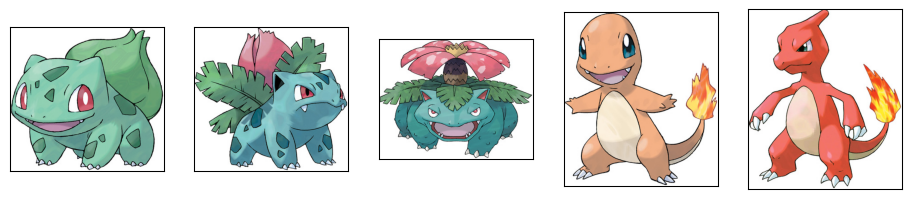

# 7. `Selenium` : mimer le comportement d’un utilisateur internet

Jusqu’à présent,
nous avons raisonné comme si nous connaissions toujours l’URL qui nous intéresse.
De plus, les pages que nous visitons sont **“statiques”**,
elles ne dépendent pas d’une action ou d’une recherche de l’internaute.

Nous allons voir à présent comment nous en sortir pour remplir
des champs sur un site *web* et récupérer ce qui nous intéresse.
La réaction d’un site *web* à l’action d’un utilisateur passe régulièrement par
l’usage de `JavaScript` dans le monde du développement *web*.
Le *package* [Selenium](https://pypi.python.org/pypi/selenium) permet
de reproduire, depuis un code automatisé, le comportement
manuel d’un utilisateur. Il permet ainsi
d’obtenir des informations du site qui ne sont pas dans le
code `HTML` mais qui apparaissent uniquement à la suite de
l’exécution de script `JavaScript` en arrière-plan.

`Selenium` se comporte comme un utilisateur *lambda* sur internet :
il clique sur des liens, il remplit des formulaires, etc.

## 7.1 Premier exemple en scrapant un moteur de recherche

Dans cet exemple, nous allons essayer d’aller sur le
site de [Bing Actualités](https://www.bing.com/news)
et entrer dans la barre de recherche un sujet donné.
Pour tester, nous allons faire une recherche avec le mot-clé **“Trump”**.

L’installation de `Selenium` nécessite d’avoir `Chromium` qui est un
navigateur Google Chrome minimaliste.
La version de [chromedriver](https://sites.google.com/a/chromium.org/chromedriver/)
doit être `>= 2.36` et dépend de la version de `Chrome` que vous avez sur votre environnement
de travail. Pour installer cette version minimaliste de `Chrome` sur un environnement
`Linux`, vous pouvez vous référer à l’encadré dédié.

<div class="alert alert-danger" role="alert">
<h3 class="alert-heading"><i class="fa-solid fa-triangle-exclamation"></i> Installation de Selenium</h3>

Sur `Colab`, vous pouvez utiliser les commandes suivantes :

``` python
!sudo apt-get update
!sudo apt install -y unzip xvfb libxi6 libgconf-2-4 -y
!sudo apt install chromium-chromedriver -y
!cp /usr/lib/chromium-browser/chromedriver /usr/bin
```

<br>

Si vous êtes sur le `SSP Cloud`, vous pouvez
exécuter les commandes suivantes :

``` python
!wget https://dl.google.com/linux/direct/google-chrome-stable_current_amd64.deb -O /tmp/chrome.deb
!sudo apt-get update
!sudo -E apt-get install -y /tmp/chrome.deb
!pip install chromedriver-autoinstaller selenium

import chromedriver_autoinstaller
chromedriver_autoinstaller.install()
```

<br>

Vous pouvez ensuite installer `Selenium`.
Par exemple, depuis une
cellule de `Notebook` :

``` python
!pip install selenium
```

</div>

Après avoir installé `Chromium`,
il est nécessaire d’indiquer à `Python` où
le trouver. Si vous êtes sur `Linux` et que vous
avez suivi les consignes précédentes, vous pouvez faire :

In [45]:
import selenium
from webdriver_manager.chrome import ChromeDriverManager

path_to_web_driver = ChromeDriverManager().install()


En premier lieu, il convient d’initialiser le comportement
de `Selenium` en répliquant les paramètres
du navigateur. Pour cela, on va d’abord initialiser
notre navigateur avec quelques options :

In [46]:
import time

from selenium import webdriver
from selenium.webdriver.common.keys import Keys

chrome_options = webdriver.ChromeOptions()
chrome_options.add_argument("--headless")
chrome_options.add_argument("--no-sandbox")
chrome_options.add_argument("--disable-dev-shm-usage")
# chrome_options.add_argument('--verbose')


Puis on lance le navigateur :

In [47]:
from selenium.webdriver.chrome.service import Service

service = Service(executable_path=path_to_web_driver)

browser = webdriver.Chrome(service=service, options=chrome_options)


On va sur le site de `Bing Actualités`,
et on lui indique le mot-clé que nous souhaitons chercher.
En l’occurrence, on s’intéresse aux actualités de Donald Trump.
Après avoir inspecté la page depuis les outils de développement du navigateur,
on voit que la barre de recherche est un élément du code appelé `q` (comme *query*).
On va ainsi demander à `selenium` de chercher cet élément:

In [48]:
browser.get("https://www.bing.com/news")

search = browser.find_element("name", "q")
print(search)
print([search.text, search.tag_name, search.id])

# on envoie à cet endroit le mot qu'on aurait tapé dans la barre de recherche
search.send_keys("Trump")

search_button = browser.find_element("xpath", "//input[@id='sb_form_go']")
search_button.click()


`Selenium` permet de capturer l’image qu’on verrait dans le navigateur
avec `get_screenshot_as_png`. Cela peut être utile pour vérifier qu’on
a fait la bonne action :

In [49]:
png = browser.get_screenshot_as_png()


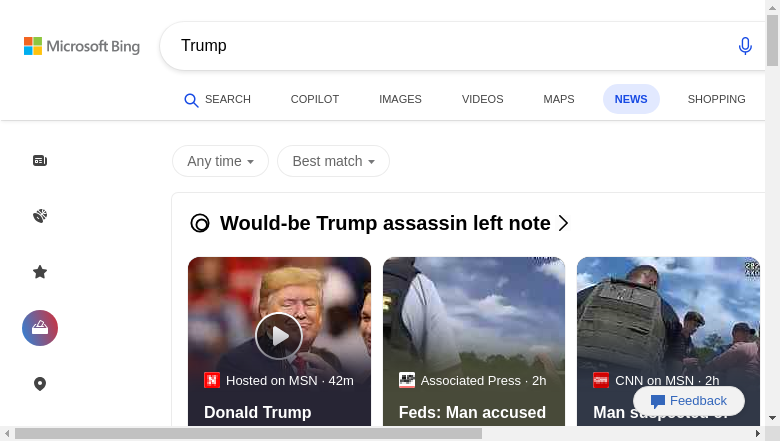

In [50]:
from IPython.display import Image

Image(png, width="500")


Enfin, on peut extraire les résultats. Plusieurs
méthodes sont disponibles. La méthode la plus
pratique, lorsqu’elle est disponible,
est d’utiliser le `XPath` qui est un chemin
non ambigu pour accéder à un élément. En effet,
plusieurs éléments peuvent partager la même classe ou
le même attribut, ce qui peut faire qu’une recherche
de ce type renvoie plusieurs échos.
Pour déterminer le `XPath` d’un objet, les outils
de développeur de votre site *web* sont pratiques.
Par exemple, sous `Firefox`, une fois que vous
avez trouvé un élément dans l’inspecteur, vous
pouvez faire `click droit > Copier > XPath`.

In [51]:
from selenium.common.exceptions import StaleElementReferenceException

links = browser.find_elements("xpath", "//div/a[@class='title'][@href]")

results = []
for link in links:
    try:
        url = link.get_attribute("href")
    except StaleElementReferenceException as e:
        print("Issue with '{0}' and '{1}'".format(url, link))
        print("It might be due to slow javascript which produces the HTML page.")
    results.append(url)


Enfin, pour mettre fin à notre session, on demande à `Python` de quitter le navigateur:

In [52]:
browser.quit()


On a obtenu les résultats suivants :

In [53]:
print(results)


['https://www.foxnews.com/politics/former-ag-barr-dumbfounded-dojs-decision-release-letter-trump-would-be-assassin', 'https://www.msn.com/en-us/news/other/trump-to-rally-next-month-in-pennsylvania-city-where-his-first-assassination-attempt-occurred/ar-AA1r4Bdt?ocid=BingNewsVerp', 'https://www.cnn.com/politics/live-news/trump-harris-presidential-election-09-23-24/index.html', 'https://www.nj.com/opinion/2024/09/trumps-brand-heads-into-the-discount-bin-letters.html', 'https://www.msn.com/en-us/news/other/iran-trump-and-the-third-assassination-plot/ar-AA1r49Bq?ocid=BingNewsVerp', 'https://www.dallasnews.com/news/politics/2024/09/23/austin-jury-clears-most-trump-train-drivers-in-civil-trial-over-2020-biden-bus-encounter/', 'https://www.msn.com/en-us/news/other/donald-trump-lawyers-filing-is-ridiculous-exercise-in-gamesmanship-attorney/ar-AA1r4owr?ocid=BingNewsVerp', 'https://www.baltimoresun.com/2024/09/23/trump-says-if-he-loses-2024-run-will-be-his-last/']

Les autres méthodes utiles de `Selenium`:

| Méthode                                | Résultat                                                                                                               |
|-------------------------------------------------|-----------------------|
| `find_element(****).click()`           | Une fois qu’on a trouvé un élément réactif, notamment un bouton, on peut cliquer dessus pour activer une nouvelle page |
| `find_element(****).send_keys("toto")` | Une fois qu’on a trouvé un élément, notamment un champ où s’authentifier, on peut envoyer une valeur, ici *“toto”*.    |

## 7.2 Exercice supplémentaire

Pour découvrir une autre application possible du *web scraping*, vous pouvez également vous lancer dans le sujet 5 de l’édition 2023 d’un hackathon non compétitif organisé par l’Insee :

-   Sur [`Github`](https://github.com/InseeFrLab/funathon2023_sujet5)
-   Sur le [`SSPCloud`](https://www.sspcloud.fr/formation?search=funat&path=%5B%22Funathon%202023%22%5D)

Le contenu de la section NLP du cours pourra vous être utile pour la seconde partie du sujet !